# Explore flatfield linearity and more -- Single value

In [19]:
%matplotlib notebook

In [18]:
# imports
import numpy as np
import os
from matplotlib import pyplot as plt

from astropy.io import fits

## Init

In [2]:
exp_path = '/home/xavier/DESI/Commissioning/exposures'

## Methods

In [40]:
def get_raw_counts(hdu, amp='A'):
    img = hdu.data
    if amp == 'A':
        cut = np.median(img[2035:2060, 110:1930], axis=0)
    elif amp == 'C':
        cut = np.median(img[2130:2155, 110:1930], axis=0)
    # Return
    return cut

In [41]:
def get_oscan_row(hdu, amp='A'):
    img = hdu.data
    if amp == 'A':
        bias_row = np.median(img[2067:2092, 110:1930], axis=0)
    elif amp == 'C':
        bias_row = np.median(img[2100:2125, 110:1930], axis=0)
    # Return
    return bias_row

In [22]:
def fit_line(x, y):
    p = np.polyfit(x,y,1)
    return p

## Amp A, z2

In [11]:
exp_id = [16322, 16312, 16305, 16283, 16298]
night = '20190619'
camera = 'z2'
amp = 'A'

In [34]:
raw_counts_A = []
bias_row_A = []
exptimes = []
for iid in exp_id:
    ifile = os.path.join(exp_path, night, '000{}'.format(iid), 'desi-000{}.fits.fz'.format(iid))
    hdulist = fits.open(ifile)
    hdu = hdulist[camera]
    #import pdb; pdb.seet_trace()
    cutA = get_raw_counts(hdu, amp=amp)
    biasA = get_oscan_row(hdu, amp=amp)
    # Just take the end
    raw_counts_A.append(np.median(cutA[-100:]))
    bias_row_A.append(np.median(biasA[-100:]))
    exptimes.append(hdu.header['EXPTIME'])

In [35]:
raw_counts_A, exptimes, bias_row_A

([3177.0, 3500.0, 6078.0, 9334.5, 15749.5],
 [0.5, 1.0, 5.0, 10.0, 20.0],
 [2411.0, 2410.0, 2411.0, 2412.0, 2411.0])

### Fit

In [30]:
z_z2_A = fit_line(exptimes, raw_counts_A)
z_z2_A

array([ 645.06851424, 2858.79984604])

In [31]:
p_z2_A = np.poly1d(z_z2_A)

### Plot

<IPython.core.display.Javascript object>


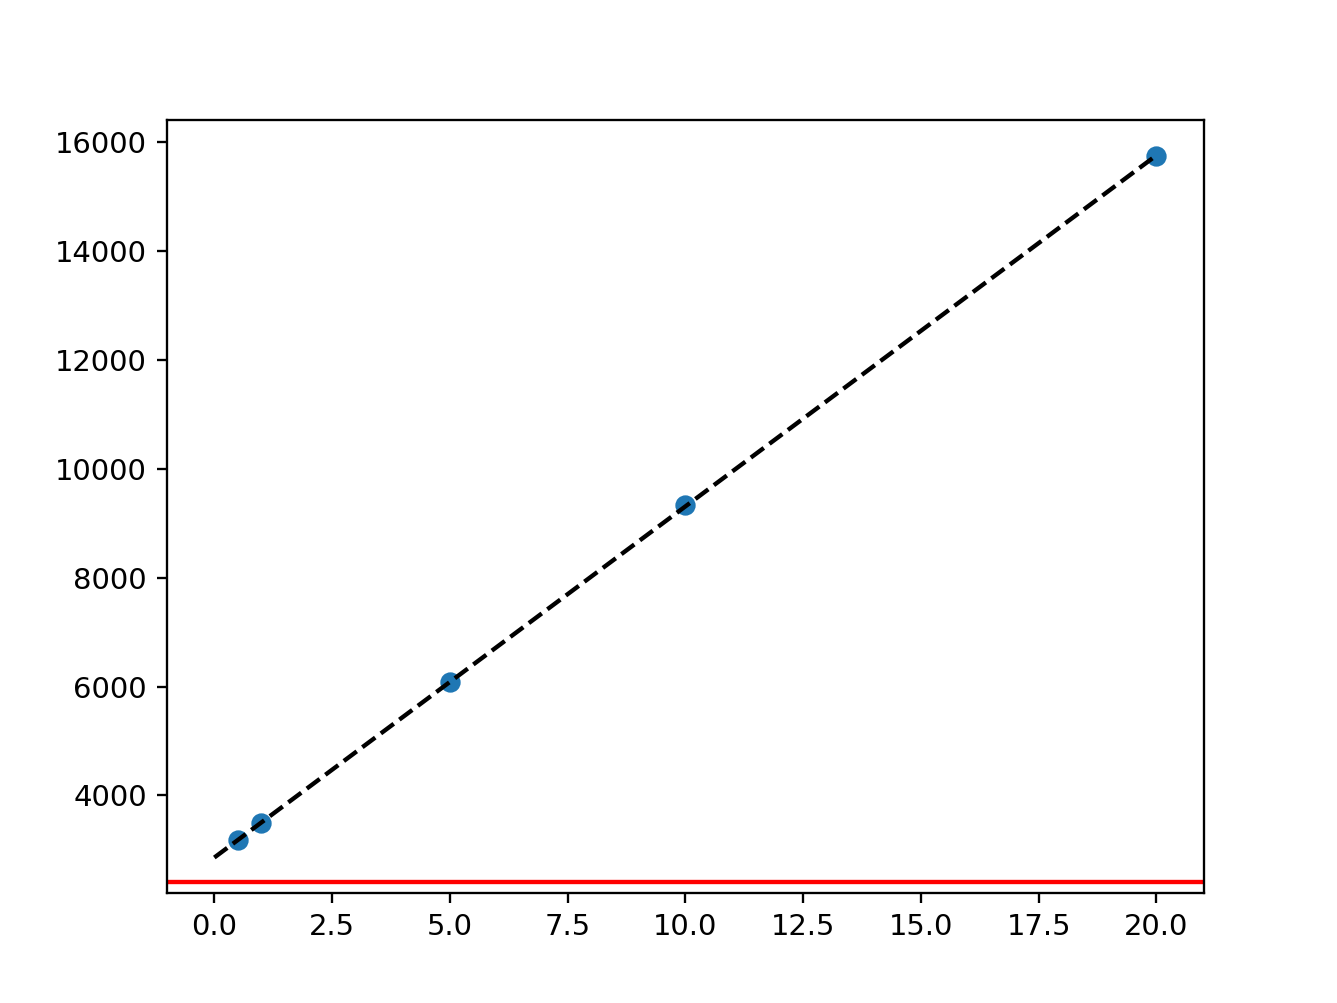

In [39]:
plt.clf()
ax = plt.gca()
ax.scatter(exptimes, raw_counts_A)
xval = np.linspace(0., np.max(exptimes), 100)
ax.plot(xval, p_z2_A(xval), 'k--')
# Bias
ax.axhline(np.median(bias_row_A), color='r')
#ax.set_ylim(0., np.max(raw_counts_A*1.1))
#
plt.show()

# Gain Ratio

## A vs. C on z2

### Grab the counts

In [42]:
raw_counts_A = []
bias_row_A = []
raw_counts_C = []
bias_row_C = []
exptimes = []
for iid in exp_id:
    ifile = os.path.join(exp_path, night, '000{}'.format(iid), 'desi-000{}.fits.fz'.format(iid))
    hdulist = fits.open(ifile)
    hdu = hdulist[camera]
    exptimes.append(hdu.header['EXPTIME'])
    # A
    cutA = get_raw_counts(hdu, amp='A')
    biasA = get_oscan_row(hdu, amp='A')
    # Just take the end
    raw_counts_A.append(np.median(cutA[-100:]))
    bias_row_A.append(np.median(biasA[-100:]))
    # C
    cutC = get_raw_counts(hdu, amp='C')
    biasC = get_oscan_row(hdu, amp='C')
    # Just take the end
    raw_counts_C.append(np.median(cutC[-100:]))
    bias_row_C.append(np.median(biasC[-100:]))

### Fit C for the "bias"

In [43]:
z_z2_C = fit_line(exptimes, raw_counts_C)
z_z2_C

array([ 573.40742879, 2874.12576982])

### Use recorded bias row values

In [48]:
gain_ratios_m = []
for rawA, biasA, rawC, biasC in zip(raw_counts_A, bias_row_A, raw_counts_C, bias_row_C):
    ratio = (rawC-biasC)/(rawA-biasA)
    gain_ratios_m.append(ratio)
gain_ratios_m

[0.8975195822454308,
 0.8917431192660551,
 0.8921461685301336,
 0.8898519321054532,
 0.8891929377366271]

### Use my bias values

In [51]:
gain_ratios_x = []
for rawA, biasA, rawC, biasC in zip(raw_counts_A, bias_row_A, raw_counts_C, bias_row_C):
    print(rawA, biasA, rawC, biasC, z_z2_A[1], z_z2_C[1])
    ratio = (rawC-z_z2_C[1])/(rawA-z_z2_A[1])
    gain_ratios_x.append(ratio)
gain_ratios_x

3177.0 2411.0 3155.5 2468.0 2858.799846035413 2874.125769822942
3500.0 2410.0 3441.0 2469.0 2858.799846035413 2874.125769822942
6078.0 2411.0 5740.5 2469.0 2858.799846035413 2874.125769822942
9334.5 2412.0 8632.0 2472.0 2858.799846035413 2874.125769822942
15749.5 2411.0 14331.0 2470.5 2858.799846035413 2874.125769822942


[0.884268051637626,
 0.8840831161253371,
 0.8903995070474234,
 0.8891508397979085,
 0.8887705162122983]

In [52]:
15000 * 0.01

150.0